<a href="https://colab.research.google.com/github/chalarm1405/DWDM21_/blob/main/Project%20for%20Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#กลุ่ม วากาเมะ

#ปัญหา : ต้องการพยากรณ์ว่าใช้ประเภทของระบบกำจัดของเสียประเภทใดมีการใช้มากที่สุด

#ใช้ข้อมูลทั้งหมด 3 ชุด 
- ข้อมูลระบบกำจัดของเสีย อ้างอิงจาก : https://data.go.th/
- ข้อมูลค่าเฉลี่ยประชากร อ้างอิงจาก : https://data.go.th/
- ข้อมูลรายได้ประชารกร อ้างอิงจาก : https://data.go.th/

ไฟล์ที่ใช้ทั้งหมด : https://drive.google.com/drive/folders/1nETPdrCX90tF_F-4eNZQIacxdAMNrqUQ?usp=sharing

In [219]:
import pandas as pd #ทำงานกับข้อมูลลักษณะตาราง

In [220]:
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
import os # os ไว้จัดการไฟล์และถาท ถาทคือที่อยู่ของไฟล์

In [222]:
path = '/content/drive/My Drive/DWDM2021_DATA' #ชื่อ path ชี้ไปไฟล์ที่เราต้องการ
data_BB = pd.read_csv(os.path.join(path,'กำจัดของเสีย.csv'))
data_BB #ข้อมูลหลักชุดที่ 1

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
2,3,เหนือ,เชียงราย,ทต.แม่สาย,บ้านเหมืองแดง ม.2 ต.แม่สาย อ.แม่สาย จ.เชียงราย,AL,ระบบสระเติมอากาศ,2556,NaN,อยู่ระหว่างการก่อสร้าง,"6,500",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
3,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
4,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,ตะวันออกเฉียงเหนือ,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
90,91,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
91,92,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
92,93,ตะวันออกเฉียงเหนือ,ศรีสะเกษ,ทม.ศรีสะเกษ,สวนสักการะ ต.ขุขันธ์ ต.หนองครก อ.เมืองศรีสะเกษ...,OD,ระบบคลองวนเวียน,2560,NaN,อยู่ระหว่างการก่อสร้าง,"12,600",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม


In [223]:
data_PP = pd.read_csv(os.path.join(path,'ค่าเฉลี่ยประชากร.csv'))
data_PP.dropna() #ข้อมูลรองชุดที่ 2

,จังหวัด,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,กรุงเทพมหานคร,12.30,10.87,11.66,11.11,8.13,54.07
1,สมุทรปราการ,11.17,9.38,10.34,9.88,7.29,48.06
2,นนทบุรี,12.12,10.87,11.49,10.86,8.06,53.40
3,ปทุมธานี,11.33,10.20,10.84,10.31,7.08,49.76
4,อยุธยา,11.11,9.04,10.26,9.32,5.47,45.20
...,...,...,...,...,...,...,...
72,ตรัง,10.16,8.31,9.29,8.45,5.06,41.27
73,พัทลุง,10.83,8.67,9.75,8.51,4.83,42.59
74,ปัตตานี,9.77,7.03,8.68,7.70,3.67,36.85
75,ยะลา,10.69,8.05,9.61,8.63,3.56,40.54


In [224]:
data_PC = pd.read_csv(os.path.join(path,'รายได้เฉลี่ย.csv'))
data_PC.dropna() #ข้อมูลรองชุดที่ 3

,จังหวัด,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,กรุงเทพมหานคร,th-bm,570327.58,626535.05,634803.16,730318.31,822454.21,947946.30000,1051118.51,5.383503e+06
1,กาญจนบุรี,th-kn,11910.00,13417.00,14576.27,17659.54,20404.73,24440.77288,27138.35,1.295467e+05
2,จันทบุรี,th-ct,4214.00,4569.00,4673.31,5239.98,5630.03,7628.47000,8469.45,4.042424e+04
3,ฉะเชิงเทรา,th-cc,3571.69,3735.06,3781.62,3984.33,4240.41,4655.55000,5007.28,2.897594e+04
4,ชลบุรี,th-cb,100537.00,111109.00,105920.27,126030.24,187788.42,240610.45000,272435.77,1.144431e+06
...,...,...,...,...,...,...,...,...,...,...
72,ระนอง,th-rn,2780.00,3250.00,3272.34,3623.68,3954.75,4311.07000,4706.13,2.589797e+04
73,สงขลา,th-sg,26702.00,37276.00,41304.80,47260.67,53493.02,59831.77000,68097.42,3.339657e+05
74,สตูล,th-sa,5332.00,5905.00,6162.46,6846.72,7438.85,8168.70000,9101.47,4.895520e+04
75,สุราษฎร์ธานี,th-st,35312.00,51550.00,56952.27,65420.63,76546.39,92228.01000,104503.71,4.825130e+05


#ดูว่าข้อมูลมี data missing

In [225]:
data_BB.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
89,False,False,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,True,False,False,False


In [226]:
data_PP.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,จังหวัด,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False


In [227]:
data_PC.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,จังหวัด,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False


#สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing

In [228]:
data_BB.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

ที่                                       False
ภาค                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                         True
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)      True
แหล่งงบประมาณ                             False
dtype: bool

In [229]:
data_PP.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

จังหวัด        False
15 - 39 ปี     False
40 - 59 ปี     False
15 - 59 ปี     False
15 ปีขึ้นไป    False
60 ปีขึ้นไป    False
ผลเฉลี่ย       False
dtype: bool

In [230]:
data_PC.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

จังหวัด        False
รหัสจังหวัด    False
2555           False
2556           False
2557           False
2558           False
2559           False
2560           False
2561           False
รวมเฉลี่ย      False
dtype: bool

จากการตรวจสอบค่า missing value ของทั้ง 3 ชุดข้อมูลพบว่ามีค่าเป็น Ture อยู่ 3 colum ในข้อมูลชุดที่ 1 คือ พ.ศ. ที่เปิดใช้งาน และ ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)

#Drop missing value
เป็นการลบข้อมูลที่มีค่า missing ออกไปจากตาราง

In [231]:
data_BB = data_BB.dropna()
data_BB

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
3,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
4,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
5,6,เหนือ,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,ตะวันออกเฉียงเหนือ,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
89,90,ตะวันออกเฉียงเหนือ,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
90,91,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
91,92,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม


#ตรวสจสอบเมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่

In [232]:
data_BB.isnull().any()

ที่                                       False
ภาค                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                        False
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)     False
แหล่งงบประมาณ                             False
dtype: bool

#Percent of missing data from dropna 
เป็นการตรวจสอบว่าเมื่อลบข้อมูลทิ้งไปแล้วเราสูญเสียข้อมูลไปกี่เปอร์เซ็นต์

In [233]:
before = 94
after = 85
print(f'before = {before} \nafter = {after}\nwhich is {100*((before-after)/before)}')

before = 94 
after = 85
which is 9.574468085106384


จะเห็นได้ว่าค่าของข้อมูลที่สูญหายไปคิดเป็น 9.574468085106384 %

#รวมตาราง

In [234]:
table = pd.merge(data_BB,data_PP,on='จังหวัด') #รวมตารางข้อมูลชุดที่ 1 และ 2

In [235]:
table

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36
2,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06
3,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96
4,6,เหนือ,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,89,ตะวันออกเฉียงเหนือ,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80
74,90,ตะวันออกเฉียงเหนือ,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80
75,91,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25
76,92,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25


In [236]:
table_3 = pd.merge(table,data_PC,on='จังหวัด') #รวมตารางข้อมูลชุดที่ 1 และ 2 และ 3

In [237]:
table_3

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.0,58551.0,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.0,1580.0,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
4,6,เหนือ,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.0,994.0,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,89,ตะวันออกเฉียงเหนือ,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
70,90,ตะวันออกเฉียงเหนือ,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
71,91,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14
72,92,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14


In [238]:
table_3.isnull().any()

ที่                                       False
ภาค                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                        False
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)     False
แหล่งงบประมาณ                             False
15 - 39 ปี                                False
40 - 59 ปี                                False
15 - 59 ปี                                False
15 ปีขึ้นไป                               False
60 ปีขึ้นไป                               False
ผลเฉลี่ย                                  False
รหัสจังหวัด                               False
2555                                      False
2556                                    

In [239]:
table_3.shape #ตาราง table_3 มี 74 แถว 27 colum

(74, 27)

In [240]:
table_3.mean() #ตวจสอบค่าเฉลี่ยของแต่ละบริษัท

ที่                           43.554054
พ.ศ. ที่ได้รับงบประมาณ      2547.472973
พ.ศ. ที่เปิดใช้งาน          2549.783784
15 - 39 ปี                    10.619324
40 - 59 ปี                     7.901081
15 - 59 ปี                     9.314459
15 ปีขึ้นไป                    8.295541
60 ปีขึ้นไป                    4.948514
ผลเฉลี่ย                      41.078919
2555                       21061.964865
2556                       24107.887027
2557                       24559.745000
2558                       28074.892297
2559                       34835.735946
2560                       41877.167838
2561                       47024.057838
รวมเฉลี่ย                 221541.450811
dtype: float64

#ตรวจสอบดูการลบข้อมูลที่ซ้ำกัน

In [241]:
table_3_un = table_3.drop_duplicates()
table_3_un

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.0,58551.0,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.0,1580.0,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
4,6,เหนือ,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.0,994.0,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,89,ตะวันออกเฉียงเหนือ,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
70,90,ตะวันออกเฉียงเหนือ,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
71,91,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14
72,92,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14


จากการตรวจสอบข้อมูลที่ซ้ำ ของ table พบว่าไม่มีค่าข้อมูลที่ซ้ำกัน

#Data Mining

#สร้างตารางที่ใช้ในการดู challenge

In [242]:
data = table_3[['จังหวัด','ประเภทของระบบ','ผลเฉลี่ย','รวมเฉลี่ย']]
data

,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
0,เชียงราย,ระบบสระเติมอากาศ,36.36,160035.50
1,เชียงราย,ระบบบึงประดิษฐ์,36.36,160035.50
2,เชียงใหม่,ระบบสระเติมอากาศ,39.06,557866.57
3,น่าน,ระบบบ่อปรับเสถียร,39.96,13634.01
4,พะเยา,ระบบบ่อปรับเสถียร,40.28,7862.51
...,...,...,...,...
69,อุดรธานี,ระบบบ่อปรับเสถียร,39.80,58165.80
70,อุดรธานี,ระบบรวบรวมน้ำเสีย,39.80,58165.80
71,อุบลราชธานี,ระบบคลองวนเวียน,36.25,42377.14
72,อุบลราชธานี,ระบบบ่อปรับเสถียร,36.25,42377.14


In [243]:
data.shape #ข้อมูลนี้มี 74 แถว 3 คอลัม

(74, 4)

In [244]:
data.isnull().any() #ตรวจสอบว่าตารางมีค่าว่างหรือไม่ จะเห็นว่าไม่คอลัมน์ที่มีค่าว่าง

จังหวัด          False
ประเภทของระบบ    False
ผลเฉลี่ย         False
รวมเฉลี่ย        False
dtype: bool

#สร้างตารางที่ค่าเฉลี่ยนประชากรมากกว่า 40

In [245]:
data = table_3[table_3['ผลเฉลี่ย']>=40]
data

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
4,6,เหนือ,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.00,994.00,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
5,7,เหนือ,ลำปาง,ทน.ลำปาง,บ้านปงแสน ม.5 ต.ปงแสนทอง อ.เมืองลำปาง จ.ลำปาง,SP,ระบบบ่อปรับเสถียร,2545,2548.0,เปิดเดินระบบ,"12,300",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.32,7.64,9.26,7.80,4.43,40.45,th-lg,2130.00,2345.00,2437.27,2699.14,2899.70,3773.95,4202.99,20488.05
6,8,เหนือ,ลำพูน,ทม.ลำพูน,ถ.หลังสนามกีฬากลาง ต.ในเมือง อ.เมืองลำพูน จ.ลำพูน,SBR,ระบบเอสบีอาร์,2543,2546.0,เปิดเดินระบบ,"10,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.12,7.84,9.58,8.35,4.84,41.73,th-ln,930.00,1077.00,1124.06,1304.91,1373.39,1476.08,1593.53,8878.97
7,9,เหนือ,อุตรดิตถ์,ทม.อุตรดิตถ์,จุดที่ 1 สวนสาธารณะริมแม่น้ำน่าน จุดที่ 2 สวนส...,Cluster,ระบบกลุ่มอาคาร,2552,2553.0,ไม่เปิดเดินระบบ,320,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.25,8.04,9.55,8.13,5.03,42.00,th-ud,1146.00,1200.00,1312.10,1510.72,1868.96,2071.57,2206.06,11315.41
8,10,ใต้,กระบี่,อบต.อ่าวนาง,ม.7 ต.อ่าวนาง อ.เมืองกระบี่ จ.กระบี่ (เกาะพีพี),AS+WL,ระบบตะกอนเร่ง+บึงประดิษฐ์,2538,2541.0,เปิดเดินระบบ,400,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.52,8.22,9.54,8.78,4.81,41.87,th-kr,48271.00,64979.00,71206.79,76840.01,85694.48,105029.06,118676.13,570696.47
9,11,ใต้,กระบี่,อบต.อ่าวนาง,ม.2 ต.อ่าวนาง อ.เมืองกระบี่ จ.กระบี่,Cluster,ระบบกลุ่มอาคาร,2552,2552.0,ไม่เปิดเดินระบบ,400,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.52,8.22,9.54,8.78,4.81,41.87,th-kr,48271.00,64979.00,71206.79,76840.01,85694.48,105029.06,118676.13,570696.47
10,12,ใต้,ตรัง,ทน.ตรัง,ถนนเลี่ยงเมืองตรัง หมายเลข 419 ต.นาตาล่วง อ.เม...,AL,ระบบสระเติมอากาศ,2545,2548.0,เปิดเดินระบบ,"17,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.16,8.31,9.29,8.45,5.06,41.27,th-tg,6231.00,6679.00,6806.73,7500.31,8214.94,9028.01,9916.29,54376.28
11,13,ใต้,นครศรีธรรมราช,ทน.นครศรีธรรมราช,ม.2 ต.นาทราย อ.เมืองนครศรีธรรมราช จ.นครศรีธรรมราช,SP,ระบบบ่อปรับเสถียร,2550,2558.0,เปิดเดินระบบ,"33,700",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.41,8.67,9.57,8.49,5.14,42.28,th-nt,8724.00,10398.00,11829.74,13335.45,14396.87,15609.04,17136.46,91429.56
12,14,ใต้,นครศรีธรรมราช,ทม.ทุ่งสง,บริเวณหลังเขาชัยชุมพล ต.ปากแพรก อ.ทุ่งสง จ.นคร...,RBC,ระบบจานหมุนชีวภาพ,2551,2553.0,เปิดเดินระบบ,"10,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.41,8.67,9.57,8.49,5.14,42.28,th-nt,8724.00,10398.00,11829.74,13335.45,14396.87,15609.04,17136.46,91429.56
13,15,ใต้,ภูเก็ต,ทน.ภูเก็ต,ถ.รัตนโกสินทร์ 200 ปี ต.วิชิต อ.เมือง จ.ภูเก็ต,OD,ระบบคลองวนเวียน,2541,2545.0,เปิดเดินระบบ,"36,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.91,9.26,10.30,9.78,6.10,46.35,th-pu,228985.00,260442.00,263616.13,301532.21,363000.47,423012.85,477324.35,2317913.01


#แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [246]:
table = data.groupby('จังหวัด')['ประเภทของระบบ'].apply(list)
table

จังหวัด
กระบี่               [ระบบตะกอนเร่ง+บึงประดิษฐ์ , ระบบกลุ่มอาคาร ]
ขอนแก่น                       [ระบบสระเติมอากาศ, ระบบบึงประดิษฐ์ ]
จันทบุรี                                       [ระบบบ่อปรับเสถียร]
ฉะเชิงเทรา                   [ระบบคลองวนเวียน , ระบบบ่อปรับเสถียร]
ชลบุรี           [ระบบบ่อปรับเสถียร, ระบบสระเติมอากาศ, ระบบบึงป...
ชัยนาท                        [ระบบสระเติมอากาศ, ระบบบึงประดิษฐ์ ]
ตรัง                                            [ระบบสระเติมอากาศ]
นครศรีธรรมราช              [ระบบบ่อปรับเสถียร, ระบบจานหมุนชีวภาพ ]
นครสวรรค์        [ระบบตะกอนเร่งแบบชีวมวล , ระบบบ่อปรับเสถียร, ร...
นนทบุรี                           [ระบบตะกอนเร่ง , ระบบตะกอนเร่ง ]
พะเยา                                          [ระบบบ่อปรับเสถียร]
พิจิตร                       [ระบบสระเติมอากาศ, ระบบบ่อปรับเสถียร]
พิษณุโลก         [ระบบบ่อปรับเสถียร, ระบบกลุ่มอาคาร , ระบบกลุ่ม...
ภูเก็ต           [ระบบคลองวนเวียน , ระบบคลองวนเวียน , ระบบคลองว...
มหาสารคาม                                      [ระบบบ่

#ขั้นตอนติดตั้ง apyori

In [247]:
!pip install apyori

#เป็นการเรียกใช้ฟังก์ชัน apriori

In [248]:
from apyori import apriori

#ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [249]:
test_1 = list(apriori(table, min_support = 0.05))
test_1

[RelationRecord(items=frozenset({'ระบบกลุ่มอาคาร '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบกลุ่มอาคาร '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบคลองวนเวียน '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบคลองวนเวียน '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบึงประดิษฐ์ '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบึงประดิษฐ์ '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบ่อปรับเสถียร'}), support=0.5384615384615384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.5384615384615384, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบสระเติมอากาศ'}), support=0.34615

#สร้างตารางที่ค่าเฉลี่ยนประชากรน้อยกว่า 40

In [250]:
dataP = table_3[table_3['ผลเฉลี่ย']<=40]
dataP

,ที่,ภาค,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.00,20729.00,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.00,20729.00,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.00,58551.00,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.00,1580.00,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
20,23,กลาง,กำแพงเพชร,ทม.กำแพงเพชร,ถนนเลี่ยงเมือง หมู่ 6 ต.เทพนคร สี่แยกถนนพิจิตร...,SP,ระบบบ่อปรับเสถียร,2539,2543.0,เปิดเดินระบบ,"13,500",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.39,6.60,8.60,7.32,3.80,36.71,th-kp,856.00,1028.00,1091.20,1219.65,1356.34,1529.10,1616.48,8696.77
21,24,กลาง,กำแพงเพชร,ทต.สลกบาตร,ม.1 ถ.สุขาภิบาล 4 ต.สลกบาตร อ.ขาณุวรลักษบุรี จ...,SP,ระบบบ่อปรับเสถียร,2539,2551.0,เปิดเดินระบบ,500,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.39,6.60,8.60,7.32,3.80,36.71,th-kp,856.00,1028.00,1091.20,1219.65,1356.34,1529.10,1616.48,8696.77
22,25,กลาง,นครสวรรค์,ทน.นครสวรรค์,ซอยโกสีย์ 33 ถนน ต.ปากน้ำโพ อ.เมืองนครสวรรค์ จ...,MSBR,ระบบตะกอนเร่งแบบชีวมวล,2548,2551.0,เปิดเดินระบบ,"36,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
23,26,กลาง,นครสวรรค์,ทม.ชุมแสง,ม.12 ต.พิกุล อ.ชุมแสง จ.นครสวรรค์,SP,ระบบบ่อปรับเสถียร,2539,2540.0,ไม่เปิดเดินระบบ,"1,650",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
24,27,กลาง,นครสวรรค์,ทต.ท่าตะโก,บริเวณคลองเมรี ชุมชนเจ้าแม่ราตรี ม.1 ถ.แสงเดือ...,WL,ระบบบึงประดิษฐ์,2550,2551.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
30,33,กลาง,สุโขทัย,ทม.สุโขทัยธานี,บ้านบางกระบาน ม.10 ต.ยางซ้าย อ.เมืองสุโขทัย จ....,SP,ระบบบ่อปรับเสถียร,2545,2547.0,เปิดเดินระบบ,"8,400",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.57,7.58,8.97,7.65,4.67,39.44,th-so,2148.00,2513.00,2711.35,2979.59,3131.71,3510.33,3717.76,20711.74


#แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [251]:
table2 = dataP.groupby('จังหวัด')['ประเภทของระบบ'].apply(list)
table2

จังหวัด
กาฬสินธุ์                                     [ระบบสระเติมอากาศ]
กำแพงเพชร                 [ระบบบ่อปรับเสถียร, ระบบบ่อปรับเสถียร]
ชัยภูมิ                                       [ระบบสระเติมอากาศ]
ตาก                       [ระบบบ่อปรับเสถียร, ระบบบ่อปรับเสถียร]
นครปฐม                                        [ระบบสระเติมอากาศ]
นครพนม                                       [ระบบบ่อปรับเสถียร]
นครสวรรค์      [ระบบตะกอนเร่งแบบชีวมวล , ระบบบ่อปรับเสถียร, ร...
น่าน                                         [ระบบบ่อปรับเสถียร]
ยโสธร                                        [ระบบบ่อปรับเสถียร]
สกลนคร                          [ระบบบ่อปรับเสถียร+บึงประดิษฐ์ ]
สุพรรณบุรี                                   [ระบบบ่อปรับเสถียร]
สุรินทร์                   [ระบบบ่อปรับเสถียร, ระบบบึงประดิษฐ์ ]
สุโขทัย                                      [ระบบบ่อปรับเสถียร]
อำนาจเจริญ                                   [ระบบบ่อปรับเสถียร]
อุดรธานี                 [ระบบบ่อปรับเสถียร, ระบบรวบรวมน้ำเสีย ]
อุทัยธานี        

#ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [252]:
test_2 = list(apriori(table2, min_support = 0.06 ))
test_2

[RelationRecord(items=frozenset({'ระบบบึงประดิษฐ์ '}), support=0.15, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบึงประดิษฐ์ '}), confidence=0.15, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบ่อปรับเสถียร'}), support=0.65, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.65, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบสระเติมอากาศ'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบสระเติมอากาศ'}), confidence=0.25, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบ่อปรับเสถียร', 'ระบบบึงประดิษฐ์ '}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบ่อปรับเสถียร', 'ระบบบึงประดิษฐ์ '}), confidence=0.1, lift=1.0), OrderedStatistic(items_base=frozenset({'ระบบบึงประดิษฐ์ '}), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.6666666666666667, lift=1.02564

#SUMMARY

In [253]:
summary_1 = pd.read_csv(os.path.join(path,'มากกว่า 40.csv')) #ที่เป็น CSV เนื่องจากกลัวอาจารย์อ่านยากจึงนำข้อมูลที่อ่านได้ไปใส่ excell และแสดงออกมาเพื่อความสะดวกในการตรวจ
summary_1

,SUMMARY > 40,Unnamed: 1
0,ระบบ,ร้อยละ
1,ระบบกลุ่มอาคาร,15.38%
2,ระบบคลองวนเวียน,15.38%
3,ระบบบึงประดิษฐ์,15.38%
4,ระบบบ่อปรับเสถียร,53.84%
5,ระบบสระเติมอากาศ,34.61%
6,"ระบบบ่อปรับเสถียร', 'ระบบคลองวนเวียน",7.69%
7,"ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร",7.69%
8,"ระบบสระเติมอากาศ', 'ระบบบึงประดิษฐ์",11.53%
9,"ระบบสระเติมอากาศ', 'ระบบบ่อปรับเสถียร",15.38%


จะเห็นได้ว่าค่าเฉลี่ยนของประชากรมากกว่า 40 มักจะนิยมใช้ระบบกำจัดของเสียแบบบ่อปรับเสถียรมากที่สุด

In [254]:
summary_2 = pd.read_csv(os.path.join(path,'น้อยกว่า 40.csv')) #ที่เป็น CSV เนื่องจากกลัวอาจารย์อ่านยากจึงนำข้อมูลที่อ่านได้ไปใส่ excell และแสดงออกมาเพื่อความสะดวกในการตรวจ
summary_2

,SUMMARY < 40,Unnamed: 1
0,ระบบ,ร้อยละ
1,ระบบบึงประดิษฐ์,15%
2,ระบบบ่อปรับเสถียร,65%
3,ระบบสระเติมอากาศ,25%
4,"ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร",10%


In [255]:
from pandas.api.types import CategoricalDtype

In [256]:
table_3.columns #

Index(['ที่', 'ภาค', 'จังหวัด', 'หน่วยงานที่รับผิดชอบ', 'ที่ตั้ง',
       'ชื่อย่อของระบบ', 'ประเภทของระบบ', 'พ.ศ. ที่ได้รับงบประมาณ',
       'พ.ศ. ที่เปิดใช้งาน', 'สถานภาพปัจจุบัน',
       ' ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน) ', 'แหล่งงบประมาณ', '15 - 39 ปี',
       '40 - 59 ปี', '15 - 59 ปี', '15 ปีขึ้นไป', '60 ปีขึ้นไป', 'ผลเฉลี่ย',
       'รหัสจังหวัด', '2555', '2556', '2557', '2558', '2559', '2560', '2561',
       'รวมเฉลี่ย'],
      dtype='object')

#Plot กราฟ เพื่อดุค่าของข้อมูลผลเฉลี่ยในแต่ละจังหวัด

In [257]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [258]:
table_3.iloc[:,17:18]

,ผลเฉลี่ย
0,36.36
1,36.36
2,39.06
3,39.96
4,40.28
...,...
69,39.80
70,39.80
71,36.25
72,36.25


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s

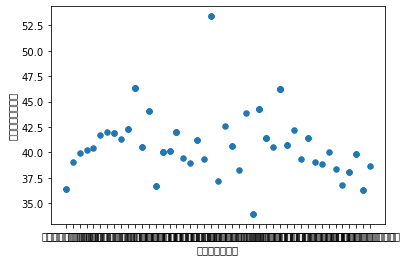

In [259]:
table_3.plot.scatter('จังหวัด','ผลเฉลี่ย', s = 30)

#Classification
ตรวจสอบพยากรณ์ว่าผลเฉลี่ยและรวมเฉลี่ยมีผลต่อประเภทของระบบอย่างไร

In [260]:
data_1 = table_3[['จังหวัด','ประเภทของระบบ','ผลเฉลี่ย','รวมเฉลี่ย']] #เลือก colum ที่ต้องการจะศึกษา
data_1 

,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
0,เชียงราย,ระบบสระเติมอากาศ,36.36,160035.50
1,เชียงราย,ระบบบึงประดิษฐ์,36.36,160035.50
2,เชียงใหม่,ระบบสระเติมอากาศ,39.06,557866.57
3,น่าน,ระบบบ่อปรับเสถียร,39.96,13634.01
4,พะเยา,ระบบบ่อปรับเสถียร,40.28,7862.51
...,...,...,...,...
69,อุดรธานี,ระบบบ่อปรับเสถียร,39.80,58165.80
70,อุดรธานี,ระบบรวบรวมน้ำเสีย,39.80,58165.80
71,อุบลราชธานี,ระบบคลองวนเวียน,36.25,42377.14
72,อุบลราชธานี,ระบบบ่อปรับเสถียร,36.25,42377.14


In [261]:
X = data_1[['ผลเฉลี่ย','รวมเฉลี่ย']] #กำหนดค่าของ X และ y เพื่อทำ decision tree ดูค่าความสัมพันธ์
y = data_1['ประเภทของระบบ']

In [262]:
X

,ผลเฉลี่ย,รวมเฉลี่ย
0,36.36,160035.50
1,36.36,160035.50
2,39.06,557866.57
3,39.96,13634.01
4,40.28,7862.51
...,...,...
69,39.80,58165.80
70,39.80,58165.80
71,36.25,42377.14
72,36.25,42377.14


In [263]:
from sklearn.model_selection import  train_test_split

In [264]:
# train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=8)

In [265]:
# train-validation
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=8)

In [266]:
X.shape #เช็คขนาด colum ของ X.shape

(74, 2)

In [267]:
X_train.shape #เช็คขนาด colum ของ X_train.shape

(37, 2)

In [268]:
X_test.shape #เช็คขนาด colum ของ X_test.shape

(37, 2)

#Decision Tree

In [269]:
from sklearn.tree import DecisionTreeClassifier #Import
from sklearn.metrics import accuracy_score 

ใช้เกณฑ์ splitter='random',random_state=13

In [270]:
#define
mytree = DecisionTreeClassifier(splitter='random',random_state=13)
#train
mytree.fit(X_train2,y_train2)
#test
mytree_result2 = mytree.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result2)

0.3684210526315789


ใช้เกณฑ์ min_samples_leaf=3,splitter='random',random_state=13

In [271]:
# Define
mytree2 = DecisionTreeClassifier(min_samples_leaf=3,splitter='random',random_state=13)
#train
mytree2.fit(X_train2,y_train2)
#test
mytree_result = mytree2.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.42105263157894735

ใช้เกณฑ์ criterion='entropy', splitter='random', random_state=13

In [272]:
#define
mytree3 = DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=13)
#train
mytree3.fit(X_train2,y_train2)
#test
mytree_result3 = mytree3.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result3)

0.3684210526315789

ใช้ค่าเริ่มต้นทดสอบ

In [273]:
#define
mytree4 = DecisionTreeClassifier()
#train
mytree4.fit(X_train2,y_train2)
#test
mytree_result = mytree4.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.42105263157894735

#Retrain & Evaluate

In [290]:
#import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [291]:
#Define
mytree3_final = DecisionTreeClassifier(splitter='random',random_state=13)
#Train
mytree3_final.fit(X_train,y_train)
#Predict
mytree3_final_result = mytree3_final.predict(X_test)

In [292]:
#Evaluate
acc_decision_tree = accuracy_score(y_test, mytree3_final_result)
acc_decision_tree

0.13513513513513514

In [293]:
#หา Confusion Matrix
confusion_matrix(y_test, mytree3_final_result)

array([[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0],
       [3, 2, 0, 0, 2, 2, 3, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [294]:
#ดูตารางที่ได้จาก confusion matrix
con_mat_tree = classification_report(y_test, mytree3_final_result)
print(con_mat_tree)

                                precision    recall  f1-score   support

               ระบบกลุ่มอาคาร        0.00      0.00      0.00         2
              ระบบคลองวนเวียน        0.00      0.00      0.00         2
            ระบบจานหมุนชีวภาพ        0.00      0.00      0.00         1
                ระบบตะกอนเร่ง        0.00      0.00      0.00         2
       ระบบตะกอนเร่งแบบชีวมวล        0.00      0.00      0.00         0
              ระบบบึงประดิษฐ์        0.12      0.25      0.17         4
             ระบบบ่อปรับเสถียร       0.27      0.20      0.23        15
ระบบบ่อปรับเสถียร+บึงประดิษฐ์        0.00      0.00      0.00         1
            ระบบรวบรวมน้ำเสีย        0.00      0.00      0.00         1
              ระบบสระเติมอากาศ       0.14      0.12      0.13         8
                 ระบบเอสบีอาร์       0.00      0.00      0.00         1

                      accuracy                           0.14        37
                     macro avg       0.05      0.05      0.05 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN

Train Model

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Knn1

In [275]:
# Define
neigh1 = KNeighborsClassifier(n_neighbors=3, weights='uniform') #ถามเพื่อนบ้านที่ใกล้สุด 3 คน และเชื่อทุกๆคนเท่ากัน
# Train
neigh1.fit(X_train2,y_train2)
# Test
knn1_result = neigh1.predict(X_val)
accuracy_score(y_val, knn1_result)

0.3684210526315789

#Knn2

In [276]:
# Define
neigh2 = KNeighborsClassifier(n_neighbors=10, weights='distance') #ถามเพื่อนบ้านที่ใกล้สุด 10 คน และเชื่อคนที่อยู่ใกล้มากกว่าไกล
# Train
neigh2.fit(X_train2,y_train2)
# Test
knn2_result = neigh2.predict(X_val)
accuracy_score(y_val, knn2_result)

0.3684210526315789

#Knn3

In [277]:
# Define
neigh3 = KNeighborsClassifier(n_neighbors=1) #เชื่อเพื่อนบ้านที่ใกล้ที่สุดคนเดียว
# Train
neigh3.fit(X_train2,y_train2)
# Test
knn3_result = neigh3.predict(X_val)
accuracy_score(y_val, knn3_result)

0.3684210526315789

##Retrain & Evaluate

In [278]:
#import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [279]:
#Define
mytree3_final = DecisionTreeClassifier(splitter='random',random_state=13)
#Train
mytree3_final.fit(X_train,y_train)
#Predict
mytree3_final_result = mytree3_final.predict(X_test)

In [280]:
#Evaluate
acc_decision_tree = accuracy_score(y_test, mytree3_final_result)
acc_decision_tree

0.13513513513513514

#Neural Network

In [281]:
from sklearn.neural_network import MLPClassifier

In [282]:
perceptron1 = MLPClassifier(random_state=13,max_iter=2000,hidden_layer_sizes=1,learning_rate_init=0.05)

#Train - Test

In [283]:
# Train
perceptron1.fit(X_train2,y_train2)
# Test
ann1_result = perceptron1.predict(X_val)
accuracy_score(y_val, ann1_result)

0.42105263157894735

#Ann2

In [284]:
perceptron2 = MLPClassifier(random_state=13,max_iter=2000,hidden_layer_sizes=10,learning_rate_init=0.05) 
# Train
perceptron2.fit(X_train2,y_train2)
# Test
ann2_result = perceptron2.predict(X_val)
accuracy_score(y_val, ann2_result)

0.42105263157894735

#ANN 3

In [285]:
perceptron3 = MLPClassifier(random_state=13,max_iter=20000,hidden_layer_sizes=10,learning_rate_init=0.01) 
# Train
perceptron3.fit(X_train2,y_train2)
# Test
ann3_result = perceptron3.predict(X_val)
accuracy_score(y_val, ann3_result)

0.42105263157894735

#Retrain & Evaluate

In [295]:
#define
perceptron3_final = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#train
perceptron3_final.fit(X_train2,y_train2)
#test
perceptron3_final_result = perceptron3_final.predict(X_test)

In [296]:
#Evaluate
acc_NN = accuracy_score(y_test, perceptron3_final_result)
acc_NN

0.40540540540540543

#Retrain & Evaluate

In [286]:
#define
perceptron3_final = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#train
perceptron3_final.fit(X_train2,y_train2)
#test
perceptron3_final_result = perceptron3_final.predict(X_test)

In [287]:
#Evaluate
acc_NN = accuracy_score(y_test, perceptron3_final_result)
acc_NN

0.40540540540540543

#วาดกราฟต้นไม้

In [288]:
from sklearn.tree import plot_tree

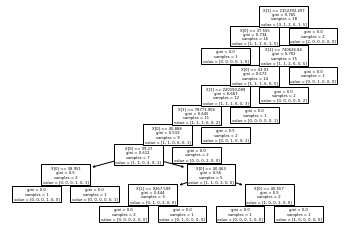

In [303]:
plot_tree(mytree);

#Advanced Tree

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
mytree = DecisionTreeClassifier(max_leaf_nodes=5,criterion='entropy')

In [306]:
mytree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(223.20000000000002, 195.696, 'X[0] <= 46.275\nentropy = 2.692\nsamples = 74\nvalue = [7, 7, 1, 2, 1, 1, 6, 29, 2, 2, 15, 1]'),
 Text(167.4, 152.208, 'X[1] <= 51630.99\nentropy = 2.534\nsamples = 69\nvalue = [7, 4, 1, 0, 1, 1, 6, 29, 2, 2, 15, 1]'),
 Text(111.60000000000001, 108.72, 'X[1] <= 11196.475\nentropy = 2.134\nsamples = 47\nvalue = [6, 3, 0, 0, 0, 1, 3, 25, 1, 0, 7, 1]'),
 Text(55.800000000000004, 65.232, 'entropy = 1.491\nsamples = 16\nvalue = [0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 5, 1]'),
 Text(167.4, 65.232, 'X[0] <= 40.59\nentropy = 2.107\nsamples = 31\nvalue = [6, 3, 0, 0, 0, 1, 2, 16, 1, 0, 2, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 2.035\nsamples = 19\nvalue = [1, 1, 0, 0, 0, 1, 2, 11, 1, 0, 2, 0]'),
 Text(223.20000000000002, 21.744, 'entropy = 1.483\nsamples = 12\nvalue = [5, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0]'),
 Text(223.20000000000002, 108.72, 'entropy = 2.698\nsamples = 22\nvalue = [1, 1, 1, 0, 1, 0, 3, 4, 1, 2, 8, 0]'),
 Text(279.0, 152.208, 'entropy = 0.97

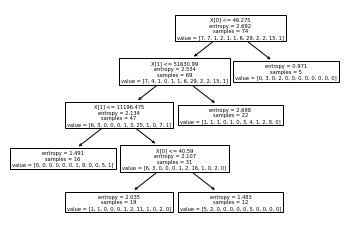

In [307]:
plot_tree(mytree)


#สรุป

model ที่เหมาะสมที่สุดกับข้อมูลชุดนี้ คือ Decision Tree ซึ่งมีความแม่นยำ 42.10%

#Visulization

No handles with labels found to put in legend.


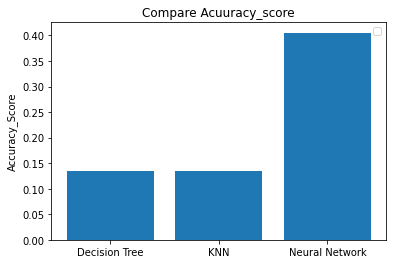

In [309]:
from matplotlib import pyplot as plt

labels = ['Decision Tree', 'KNN', 'Neural Network']
accuracy_Y = [acc_decision_tree,acc_decision_tree,acc_NN]
#plot
plt.bar(labels,accuracy_Y)
plt.ylabel('Accuracy_Score')
plt.title('Compare Acuuracy_score')
plt.legend();

In [318]:
#ใช้ข้อมูล product_category_name จัดกลุ่ม แล้วหาค่าเฉลี่ยของ freight_value
category_mean = data_1.groupby('ประเภทของระบบ')[['ผลเฉลี่ย']].mean().reset_index()
category_mean

,ประเภทของระบบ,ผลเฉลี่ย
0,ระบบกลุ่มอาคาร,40.905714
1,ระบบคลองวนเวียน,42.800000
2,ระบบจานหมุนชีวภาพ,42.280000
3,ระบบตะกอนเร่ง,53.400000
4,ระบบตะกอนเร่ง+บึงประดิษฐ์,41.870000
5,ระบบตะกอนเร่งแบบชีวมวล,40.000000
6,ระบบบึงประดิษฐ์,40.536667
7,ระบบบ่อปรับเสถียร,39.679655
8,ระบบบ่อปรับเสถียร+บึงประดิษฐ์,40.455000
9,ระบบรวบรวมน้ำเสีย,42.040000


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36

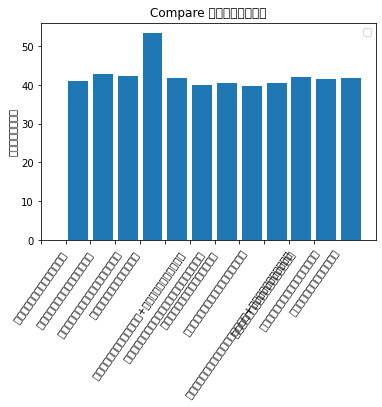

In [323]:
plt.bar(np.arange(len(category_mean.iloc[:,1])), category_mean.iloc[:,1])

plt.ylabel('ผลเฉลี่ย')
plt.title('Compare ผลเฉลี่ย')
plt.xticks(np.arange(len(category_mean.iloc[:,0]))-1.5, category_mean.iloc[:,0],rotation=55)
plt.legend();

In [327]:
change = category_mean['ผลเฉลี่ย'] > 40
mean_over40 = category_mean[change]
mean_over40

,ประเภทของระบบ,ผลเฉลี่ย
0,ระบบกลุ่มอาคาร,40.905714
1,ระบบคลองวนเวียน,42.800000
2,ระบบจานหมุนชีวภาพ,42.280000
3,ระบบตะกอนเร่ง,53.400000
4,ระบบตะกอนเร่ง+บึงประดิษฐ์,41.870000
6,ระบบบึงประดิษฐ์,40.536667
8,ระบบบ่อปรับเสถียร+บึงประดิษฐ์,40.455000
9,ระบบรวบรวมน้ำเสีย,42.040000
10,ระบบสระเติมอากาศ,41.486667
11,ระบบเอสบีอาร์,41.730000


In [330]:
plt.bar(np.arange(len(mean_over100.iloc[:,1])), mean_over100.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_over100.iloc[:,0]))-1.5, mean_over100.iloc[:,0],rotation=55)
plt.legend();

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/m

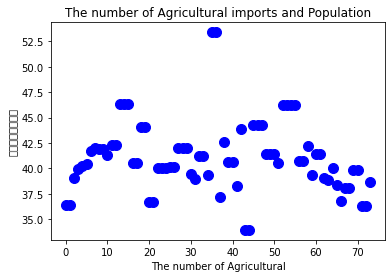

In [334]:
plt.scatter(range(len(data_1['ประเภทของระบบ'])),data_1['ผลเฉลี่ย'],s=100,c='B')
plt.xlabel('The number of Agricultural')
plt.ylabel('ผลเฉลี่ย')
plt.title('The number of Agricultural imports and Population')
plt.show()

ValueError: ignored

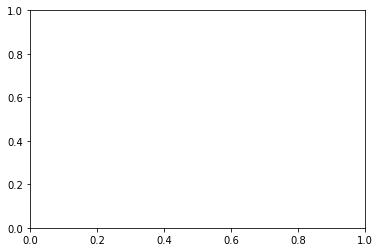

In [338]:
plt.plot(range(len(data_1['ประเภทของระบบ'])),data_1['ผลเฉลี่ย'],marker='g')
plt.xlabel('The number of Agricultural')
plt.ylabel('ผลเฉลี่ย')
plt.title('The number of Agricultural imports and Population')
plt.show()